# Question 1
- Learn and Understand Zipf's Law
- Read a set of files from NLTK corpus
- Calculate frequency of each word in the files read from NLTK corpus
- Provide rank based on frequency of each word
- Write the words alongwith their frequency and ranks in a csv file
- Read the written csv file
- Plot a log-log graph to prove Zipf's Law
- Display conclusion based on the graph plotted

In [16]:
# Importing the required packages and modules

from nltk.corpus import inaugural as aug
import matplotlib.pyplot as plt
from math import log10
import operator
import glob
import csv
import re

In [17]:
complete_words = [] # Creating an empty list which will store sublists of words 
all_words = [] # Creating an empty list which will store all words from complete_words list

for file in glob.glob('C:\\nltk_data\\corpora\inaugural\\*Roosevelt*'): # Looping through all Roosevelt files
    complete_words.append(aug.words(fileids=[file])) # For each Roosevelt files appending sublists of words

for x in complete_words: # Looping through all sublists of words
    for y in x: # Looping through each list in complete_words
        all_words.append(y) # Appending each word to the all_words

only_alphanumeric = [x for x in all_words if re.search('[a-zA-Z0-9]', x)] # Filtering all punctuations 

In [18]:
Words_Frequency = {} # Creating an empty dictionary
Word_count = 0 # Creating and assigning value to a count variable
unique_words_lambda = lambda x: set(x) # Creating a lambda function to return unique values from a list
# Creating a list which stores all unique words from words present in 'all_words' list
new_list1 = unique_words_lambda([x1.lower() for x1 in only_alphanumeric])
# Creating a list which stores all words from words present in 'all_words' list
new_list2 = [x2.lower() for x2 in only_alphanumeric] 

for x in new_list1: # Looping through all unique words
    for y in new_list2: # Looping through all words
        if x == y:
            Word_count = Word_count + 1 # Increamenting the count variable by 1 when if condition succeeds

    Words_Frequency.update({x:Word_count}) # Adding word alongwith its total frequency in the dictionary
    Word_count = 0 # Reassiging the count variable to 0 for next run of the outer for loop

In [10]:
# Sorting the dictionary value
sorted_words = sorted(Words_Frequency.items(), key=operator.itemgetter(1), reverse = True) 

In [19]:
def rankfunc(sorted_tuple_list): # Creating a function to add rank number to the sorted tuples in sorted_words
    rank = 0 # Creating a dummy variable having 0 as its value
    skip = 0 # Creating a dummy variable having 0 as its value
    prev = None # Creating a dummy variable having None as its value

    sorted_rank_tuple_list = [] # Creating an empty list which will store sorted tuples alongwith its rank number
    for word, frequency in sorted_tuple_list: #Looping through each sorted tuple
        if frequency == prev: # Checking if the current frequency equals to previous frequency
            skip += 1 # If Yes, then increment the skip variable value by 1
        else:
            # If current frequency not equals to previous frequency then current rank number is equal 
            # to previous rank plus skip variable count plus 1
            rank += skip + 1  
            skip = 0 # Reassigning skip variable to 0 for next run of the for loop

        sorted_rank_tuple_list.append((word, frequency, rank)) # Appending sorted value and its rank number
        prev = frequency # Assigning current frequency to prev variable for next run of for loop
    return sorted_rank_tuple_list # Returning the full ranked tuple list
    
sorted_rank_words = rankfunc(sorted_words) # Calling the rankfunc() by providing sorted_words list as argument

In [20]:
with open('zipfslaw.csv','w', newline='') as out: # Opening a file in write mode
    csv_out=csv.writer(out) # Calling the writer function on opened file
    csv_out.writerow(['Word','Frequency','Rank']) # Using writer function writing the TITLE row
    for row in sorted_rank_words: # Looping through each tuple in sorted_rank_words list
        csv_out.writerow(row) # Writing each tuple as a row to the opened file

In [21]:
r = csv.reader(open('zipfslaw.csv')) # Reading the previously written file
actual_lines = [l for l in r] # Storing each row as a sublist

In [22]:
frequency_list = [x[1] for x in actual_lines if re.search('[0-9]', x[1])] # Fetching all frequency eliminating TITLE value

rank_list = [x[2] for x in actual_lines if re.search('[0-9]', x[2])] # Fetching all ranks eliminating TITLE value

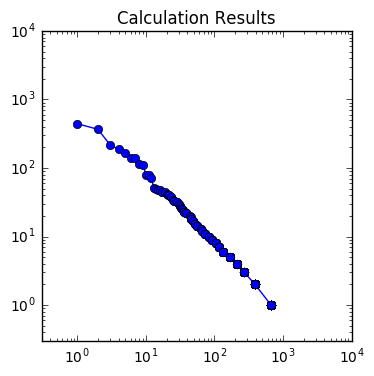

Conclusion: Zipf's Law works on Natural Language as slope is close to -1


In [23]:
# Creating a function to create and display log-log plot using matplotlib
def zipfslawplotfunc(rank, frequency, xlowlimit, xhighlimit, ylowlimit, yhighlimit):
    fig = plt.figure() # Calling the figure function to plot log-log graph
    ax = fig.add_subplot(111) # Calling the plot builder function add_subplot within figure function
    ax.set_xscale("log") # Setting the x-axis to store log values of each rank
    ax.set_yscale("log") # Setting the y-axis to store log values of each frequency
    ax.set_xlim(xlowlimit, xhighlimit) # Setting the upper and lower limit for x-axis
    ax.set_ylim(ylowlimit, yhighlimit) # Setting the upper and lower limit for y-axis
    ax.set_aspect(1)
    ax.set_title("Calculation Results") # Setting the title for log-log plot

    ax.plot(rank, frequency, "o-") # Plotting the log-log graph
    plt.show() # Displaying the log-log plot

# Calling the zipfslawplotfunc function by providing rank list, frequency list, x lower limit, x higher limit,
# y lower limit, y higher limit as argument
zipfslawplotfunc(rank_list, frequency_list, 0.3, 1e4, 0.3, 1e4) 
print("Conclusion: Zipf's Law works on Natural Language as slope is close to -1") # Displaying the conclusion